## ・訓練誤差収束速度の計測

In [1]:
import json
import matplotlib.pyplot as plt

In [8]:
def load_json(json_path):
    f = open(json_path, "r")
    loaded_json = json.load(f)
    return loaded_json

def get_train_losses(train_log):
    train_losses = []
    for i in train_log:
        train_losses.append(i["train loss"])
    return train_losses

def plot_train_losses(train_losses, color="black", linewidth=2):
    x = list(range(1, len(train_losses)+1))
    y = train_losses
    plt.figure(figsize=(8,6))
    plt.plot(x, y, color=color, linewidth=linewidth)

In [3]:
def get_standard_losses(epoch=80):
    x = list(range(1, epoch+1))
    standard_losses = []
    for i in x:
        standard_losses.append(0.8**i + 0.25)
    return standard_losses

In [4]:
# 訓練誤差収束速度の評価
# a: 係数
# n: 誤差の傾きの計測範囲
# Ep: pエポックにおける訓練誤差
# 訓練誤差収束速度: S = Σ-a/k(Enk - Enk-n+1)

def eval_train_err_speed(train_losses, a=50, n=10):
    train_err_speed = 0.0
    E = train_losses
    maxepoch = len(train_losses)
    ks = maxepoch//n
    for k in range(1, ks+1):
        train_err_speed += (-a / k) * (E[n*k-1] - E[n*k - n])
    return train_err_speed

訓練誤差収束速度
y1:   25.376592185222915
y2:   40.68744744513526
y3:   36.635363881297906


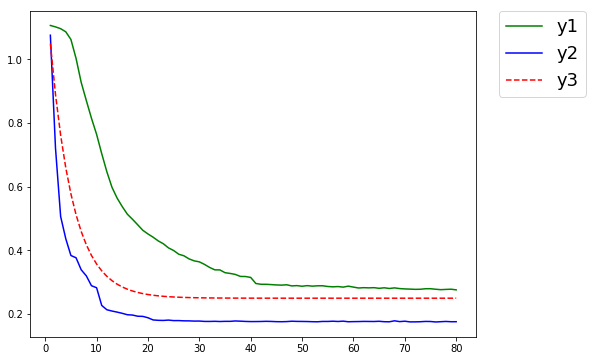

In [60]:
epoch = 80
x = list(range(1, epoch+1))

json_path1 = "../prototype/pytorch_prototype/result/v5/log.json"
train_log1 = load_json(json_path1)
y1 = get_train_losses(train_log1)[:epoch]

json_path2 = "../prototype/pytorch_prototype/result/v6/log.json"
train_log2 = load_json(json_path2)
y2 = get_train_losses(train_log2)[:epoch]

y3 = get_standard_losses(epoch=epoch)

plt.figure(figsize=(8,6))
plt.plot(x, y1, color="green", label="y1")
plt.plot(x, y2, color="blue", label="y2")
plt.plot(x, y3, color="red", linestyle="dashed", label="y3")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

print("訓練誤差収束速度")
print("y1:  ", eval_train_err_speed(y1))
print("y2:  ", eval_train_err_speed(y2))
print("y3:  ", eval_train_err_speed(y3))

訓練誤差収束速度:   25.371293710522554


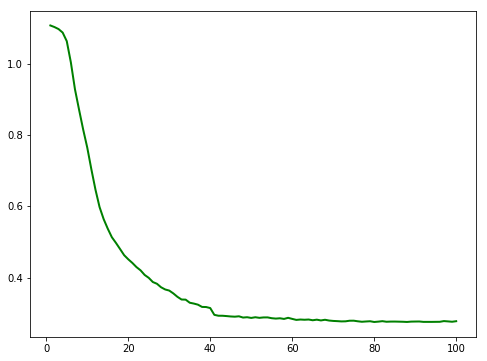

In [47]:
json_path = "../prototype/pytorch_prototype/result/v5/log.json"
train_log = load_json(json_path)
train_losses = get_train_losses(train_log)
plot_train_losses(train_losses, color="green")
train_err_speed = eval_train_err_speed(train_losses)
print("訓練誤差収束速度:  ",train_err_speed)

訓練誤差収束速度:   40.68744744513526


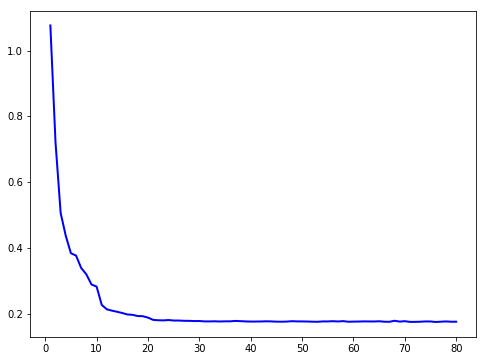

In [48]:
json_path = "../prototype/pytorch_prototype/result/v6/log.json"
train_log = load_json(json_path)
train_losses = get_train_losses(train_log)
plot_train_losses(train_losses, color="blue")
train_err_speed = eval_train_err_speed(train_losses)
print("訓練誤差収束速度:  ",train_err_speed)

訓練誤差収束速度:   36.635363881297906


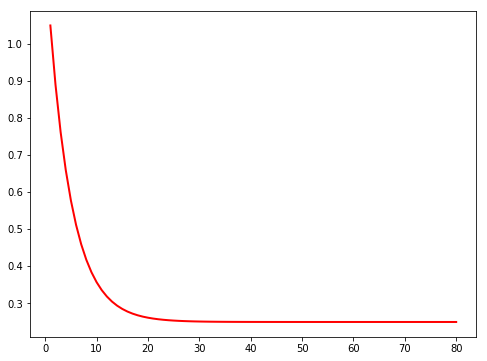

In [61]:
train_losses = get_standard_losses(epoch=80)
plot_train_losses(train_losses, color="red")
train_err_speed = eval_train_err_speed(train_losses)
print("訓練誤差収束速度:  ",train_err_speed)

訓練誤差収束速度
y1:   25.376592185222915
y3:   36.635363881297906


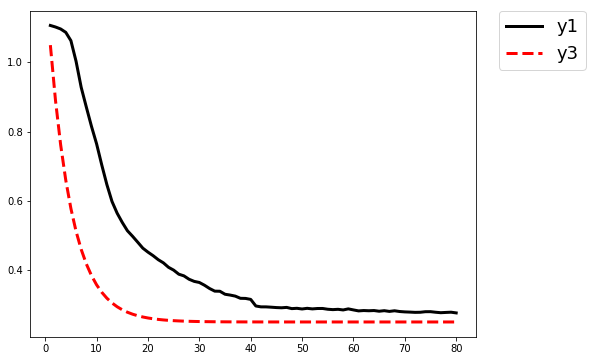

In [11]:
epoch = 80
x = list(range(1, epoch+1))

json_path1 = "../prototype/pytorch_prototype/result/v5/log.json"
train_log1 = load_json(json_path1)
y1 = get_train_losses(train_log1)[:epoch]

y3 = get_standard_losses(epoch=epoch)

plt.figure(figsize=(8,6))
plt.plot(x, y1, color="black", label="y1", linewidth=3)
plt.plot(x, y3, color="red", linestyle="dashed", label="y3", linewidth=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

print("訓練誤差収束速度")
print("y1:  ", eval_train_err_speed(y1))
print("y3:  ", eval_train_err_speed(y3))

訓練誤差収束速度
y2:   40.68744744513526
y3:   36.635363881297906


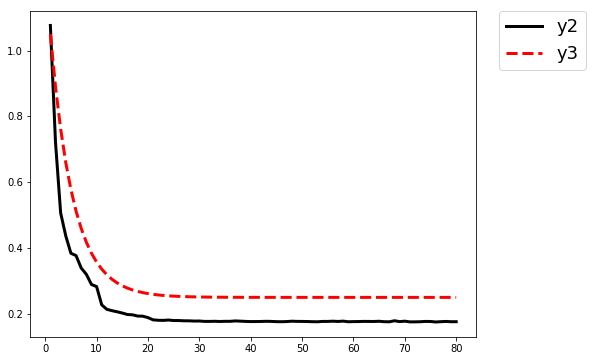

In [12]:
epoch = 80
x = list(range(1, epoch+1))

json_path2 = "../prototype/pytorch_prototype/result/v6/log.json"
train_log2 = load_json(json_path2)
y2 = get_train_losses(train_log2)[:epoch]

y3 = get_standard_losses(epoch=epoch)

plt.figure(figsize=(8,6))
plt.plot(x, y2, color="black", label="y2", linewidth=3)
plt.plot(x, y3, color="red", linestyle="dashed", label="y3", linewidth=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

print("訓練誤差収束速度")
print("y2:  ", eval_train_err_speed(y2))
print("y3:  ", eval_train_err_speed(y3))